In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pre_processed_data_1.csv to pre_processed_data_1 (3).csv


In [3]:
customer_data_df = pd.read_csv("pre_processed_data_1.csv", sep = "\t")
customer_data_df

,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Days_Customer,Related,Single,Unrelated,Post-Graduate,Under-Graduate
0,58138.0,1,0,1617,0,25,65,3668,0.0,1.0,0.0,1.0,0.0
1,46344.0,0,2,27,0,6,68,2822,0.0,1.0,0.0,1.0,0.0
2,71613.0,0,0,776,0,21,57,3169,1.0,0.0,0.0,1.0,0.0
3,26646.0,0,1,53,0,8,38,2762,1.0,0.0,0.0,1.0,0.0
4,58293.0,0,1,422,0,19,41,3018,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,1341,0,18,55,3238,1.0,0.0,0.0,1.0,0.0
2236,64014.0,0,3,444,1,22,76,2758,1.0,0.0,0.0,1.0,0.0
2237,56981.0,0,0,1241,1,19,41,3012,0.0,1.0,0.0,1.0,0.0
2238,69245.0,0,1,843,0,23,66,3013,1.0,0.0,0.0,1.0,0.0


In [4]:
X = customer_data_df.drop('Response', axis = 1)
y = customer_data_df['Response']

In [5]:
ss = StandardScaler()
X_scale = ss.fit_transform(X)

In [6]:
xdev, xtest, ydev, ytest = train_test_split(X, y, stratify = y, test_size=0.2)

In [7]:
ytest_original = ytest
ydev = to_categorical(ydev, 2)
ytest = to_categorical(ytest, 2)

In [8]:
print(xdev.shape)
print(ydev.shape)

(1792, 12)
(1792, 2)


In [9]:
def create_model(optimizer):
  model = Sequential([
      layers.Dense(128, input_shape=(12,)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(64),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(32),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(2, activation = 'sigmoid')
  ])
  optimizer = optimizer
  model.compile(optimizer= optimizer,
                loss="binary_crossentropy",
                metrics=['accuracy'])
  return model

clf = KerasClassifier(create_model, epochs=20)
param_grid = {'batch_size':[32, 64, 128], 
              'optimizer':['adam', 'SGD']}
grid = GridSearchCV(clf, param_grid = param_grid, cv = 3)
history = grid.fit(xdev, ydev)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/20
38/38 [==============================] - 2s 4ms/step - loss: 0.8157 - accuracy: 0.3987
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.8032
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.8434
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.8467
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3973 - accuracy: 0.8551
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8467
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8526
Epoch 8/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8559
Epoch 9/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8484
Epoch 10/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8526
Epoch 11/20
38/38 [

In [10]:
best_index = history.cv_results_['rank_test_score'][0]
history.cv_results_['params'][best_index]

{'batch_size': 64, 'optimizer': 'SGD'}

In [15]:
model = Sequential([
    layers.Dense(128, input_shape=(12,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(2, activation = 'sigmoid')
])
optimizer = 'SGD'
model.compile(optimizer= optimizer,
              loss="binary_crossentropy",
              metrics=['categorical_accuracy'])
history = model.fit(
  xdev,
  ydev,
  epochs=30,
  batch_size = 64,
  validation_split=0.2
)

Epoch 1/30
23/23 [==============================] - 1s 13ms/step - loss: 0.8245 - categorical_accuracy: 0.6246 - val_loss: 2.2238 - val_categorical_accuracy: 0.1783
Epoch 2/30
23/23 [==============================] - 0s 4ms/step - loss: 0.6963 - categorical_accuracy: 0.7865 - val_loss: 1.2465 - val_categorical_accuracy: 0.3203
Epoch 3/30
23/23 [==============================] - 0s 5ms/step - loss: 0.5964 - categorical_accuracy: 0.8221 - val_loss: 0.9580 - val_categorical_accuracy: 0.4262
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5473 - categorical_accuracy: 0.8332 - val_loss: 1.0841 - val_categorical_accuracy: 0.3315
Epoch 5/30
23/23 [==============================] - 0s 4ms/step - loss: 0.5010 - categorical_accuracy: 0.8423 - val_loss: 0.6560 - val_categorical_accuracy: 0.6518
Epoch 6/30
23/23 [==============================] - 0s 5ms/step - loss: 0.4715 - categorical_accuracy: 0.8521 - val_loss: 0.6799 - val_categorical_accuracy: 0.7382
Epoch 7/30
23/2

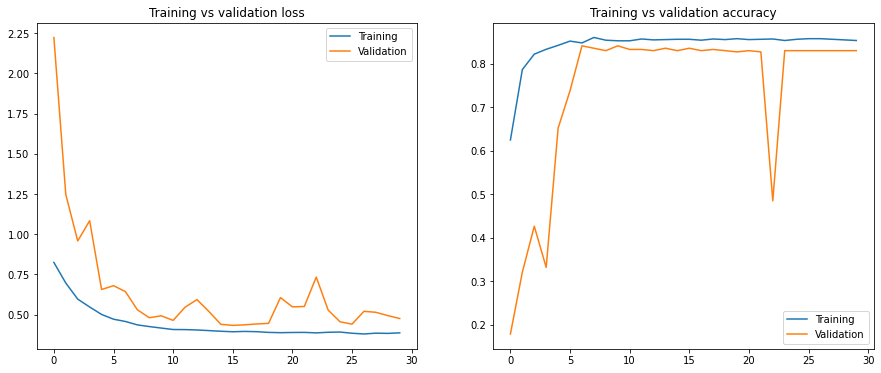

In [16]:
def plotAccLoss(history, epoch):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']

  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(range(epoch), loss, label='Training')
  plt.plot(range(epoch), val_loss, label='Validation')
  plt.legend()
  plt.title('Training vs validation loss')

  plt.subplot(1, 2, 2)
  plt.plot(range(epoch), acc, label='Training')
  plt.plot(range(epoch), val_acc, label='Validation')
  plt.legend()
  plt.title('Training vs validation accuracy')
  plt.show()

plotAccLoss(history, epoch = 30)

In [17]:
metrics = model.evaluate(xtest, ytest)

14/14 [==============================] - 0s 2ms/step - loss: 0.4259 - categorical_accuracy: 0.8504


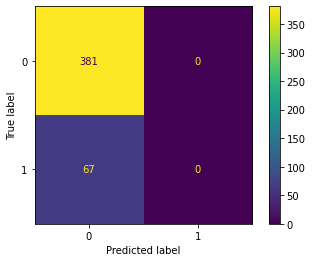

In [18]:
ytest_pred = model.predict(xtest)
ytest_pred = np.array([x[-1] for x in np.argsort(ytest_pred, axis=1)])
mcm = confusion_matrix(ytest_original, ytest_pred)
disp = ConfusionMatrixDisplay(mcm)
disp.plot()

In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(29,)),
   
#     keras.layers.Dense(16, activation=tf.nn.relu),
 
# 	  keras.layers.Dense(16, activation=tf.nn.relu),
   
#     keras.layers.Dense(1, activation=tf.nn.sigmoid),
# ])

# model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 29)                0         
                                                                 
 dense_56 (Dense)            (None, 16)                480       
                                                                 
 dense_57 (Dense)            (None, 16)                272       
                                                                 
 dense_58 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(xdev,ydev, batch_size=1,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
1344/1344 [==============================] - 3s 2ms/step - loss: 111.4839 - accuracy: 0.7374 - val_loss: 68.3547 - val_accuracy: 0.8244
Epoch 2/50
1344/1344 [==============================] - 2s 2ms/step - loss: 80.5246 - accuracy: 0.7723 - val_loss: 16.0142 - val_accuracy: 0.7738
Epoch 3/50
1344/1344 [==============================] - 3s 2ms/step - loss: 69.4300 - accuracy: 0.7879 - val_loss: 125.6422 - val_accuracy: 0.8304
Epoch 4/50
1344/1344 [==============================] - 2s 2ms/step - loss: 66.4932 - accuracy: 0.7686 - val_loss: 16.2684 - val_accuracy: 0.8095
Epoch 5/50
1344/1344 [==============================] - 3s 2ms/step - loss: 45.7446 - accuracy: 0.7932 - val_loss: 23.7714 - val_accuracy: 0.6369
Epoch 6/50
1344/1344 [==============================] - 3s 3ms/step - loss: 35.4514 - accuracy: 0.7879 - val_loss: 32.7136 - val_accuracy: 0.8304
Epoch 7/50
1344/1344 [==============================] - 2s 2ms/step - loss: 38.7605 - accuracy: 0.7783 - val_loss: 62.2023

Text(0.5, 0, 'epochs')

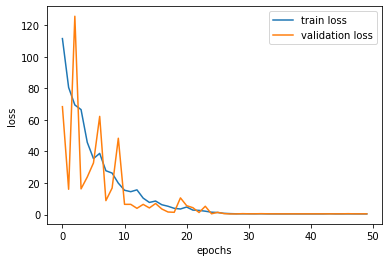

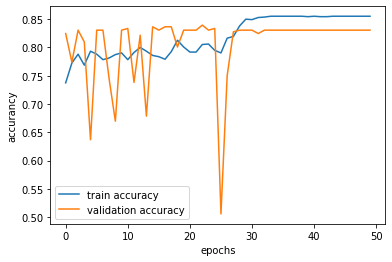

In [ ]:
# hist = pd.DataFrame(history.history)
# fig, ax = plt.subplots(1) 
# fig2, ax2 = plt.subplots(1) 

# line1, = ax.plot(hist.index,hist['loss'], label='train loss')
# line2, = ax.plot(hist.index,hist['val_loss'], label='validation loss')
# line3, = ax2.plot(hist.index,hist['accuracy'], label='train accuracy')
# line4, = ax2.plot(hist.index,hist['val_accuracy'], label='validation accuracy')

# ax.legend(handles=[line1, line2])
# ax.set_ylabel("loss")
# ax.set_xlabel("epochs")
# ax2.legend(handles=[line3, line4])
# ax2.set_ylabel("accurancy")
# ax2.set_xlabel("epochs")

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 29)                0         
                                                                 
 dense_59 (Dense)            (None, 16)                480       
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_60 (Dense)            (None, 16)                272       
                                                                 
 dropout_25 (Dropout)        (None, 16)                0         
                                                                 
 dense_61 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable

Text(0, 0.5, 'accurancy')

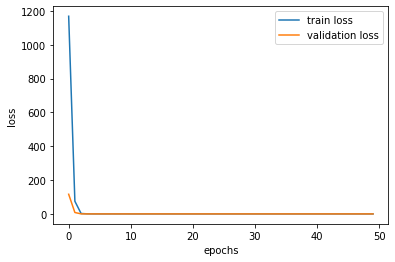

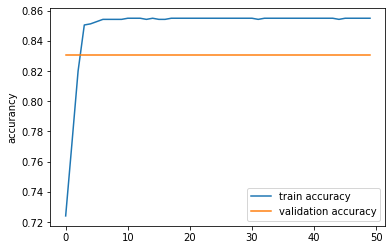

In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(29,)),
  
#     keras.layers.Dense(16, activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
# 	  keras.layers.Dense(16, activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid),
# ])

# model.summary()
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(xdev,ydev, batch_size=1,epochs=50,verbose=1,validation_split=0.2)
# hist = pd.DataFrame(history.history)
# fig, ax = plt.subplots(1) 
# fig2, ax2 = plt.subplots(1) 

# line1, = ax.plot(hist.index,hist['loss'], label='train loss')
# line2, = ax.plot(hist.index,hist['val_loss'], label='validation loss')
# line3, = ax2.plot(hist.index,hist['accuracy'], label='train accuracy')
# line4, = ax2.plot(hist.index,hist['val_accuracy'], label='validation accuracy')

# ax.legend(handles=[line1, line2])
# ax.set_ylabel("loss")
# ax.set_xlabel("epochs")
# ax2.legend(handles=[line3, line4])
# ax2.set_ylabel("accurancy")